In [65]:
os.environ["mongo_server"] = "HIDDEN"

In [67]:
from pymongo import MongoClient, GEOSPHERE
import pandas as pd
import os

MONGO_URL = os.environ["mongo_server"] # Dirección mlab para la base de datos

client = MongoClient(MONGO_URL)

db = client.datalab
locations = db.locations

def import_csv(path):
    outDataFrame= pd.DataFrame.from_csv(path, index_col = False)
    return outDataFrame

In [50]:
locations_dataframe  = import_csv("../data/processed/refugios_nayarit.csv")

In [51]:
locations_dataframe

,altitud,capacidad,direccion,latitud,longitud,municipio,no,refugio,responsable,servicios,telefono,uso,latitud_limpia,longitud_limpia
0,29.0,200.0,LOPEZ RAYON,"22°29'56.06""","105°21'37.27""",ACAPONETA,1.0,PRIMARIA LABOR Y CONSTANCIA,DIR. ENRIQUE JIMENEZ LOPEZ.,"AGUA, SANITARIOS Y LUZ ELECTRICA",CEL.-325-105-89-02,EDUCACION,22.498906,-105.360353
1,34.0,100.0,ALDAMA ESQ CHAPULTEPEC,"22°29'53.14""","105°21'29.48""",ACAPONETA,2.0,JARDIN DE NIÑOS LUIS CASTILLO LEDON,MAYRA SILVIA,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-252-11-80,EDUCACION,22.498094,-105.358189
2,30.0,200.0,E. CARRANZA,"22º30'00.43""","105°21'37.46""",ACAPONETA,3.0,PRIMARIA CARMEN SERDAN,MA. LOPEZ CATON,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-251-16-40,EDUCACION,22.500119,-105.360406
3,30.0,100.0,AMADO NERVO,"22°29'27.17""",105°21'39.68,ACAPONETA,4.0,PRIMARIA LAZARO CARDENAS,DIR. AZAEL AGUILAR,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-252-17-48,EDUCACION,22.490881,-105.361022
4,30.0,150.0,VERACRUZ No.47,"22º29'40.21""","105ª21'40.23""",ACAPONETA,5.0,PRIMARIA H. AYUNTAMIENTO 1955,AURORA BARRON MEDINA,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-251-02-82,EDUCACION,22.494503,-105.361175
5,30.0,200.0,MORELOS Y OAXACA,"22º29'23.26""","105ª21'41.99""",ACAPONETA,6.0,PRIMARIA MIGUEL HIDALGO Y COSTILLA,ALBERTO VILLEGAS,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-252-09-16,EDUCACION,22.489794,-105.361664
6,30.0,250.0,MATAMOROS Y PUEBLA,"22º29'37.31""","105ª21'33.33""",ACAPONETA,7.0,PRIMARIA CENTRO ESCOLAR,JORGE BURGUEÑO,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-252-01-57,EDUCACION,22.493697,-105.359258
7,30.0,100.0,QUERETARO Y CORONA,"22°29'39.32""",105°21'46.60,ACAPONETA,8.0,SINDICATO CTM,JUAN DIEGO HERRERA,"AGUA, SANITARIOS Y LUZ ELECTRICA",PCM.-323-252-19-46,GREMIO SINDICAL,22.494256,-105.362944
8,30.0,300.0,JUAN ESCUTIA,"22ª29'55.10""","105ª21'52.29""",ACAPONETA,9.0,ESTADIO MUNICIPAL,JOSE DOMINGO ROMERO ORTEGA,"AGUA, SANITARIOS Y LUZ ELECTRICA",325-2510748,DEPORTE,22.498639,-105.364525
9,30.0,300.0,MORELOS,"22ª29'20.78""","105ª21'46.46""",ACAPONETA,10.0,CASA DE LA CULTURA,MARIO RODRIGUEZ,"AGUA, SANITARIOS Y LUZ ELECTRICA",PCM.-323-252-19-46,CULTURAL,22.489106,-105.362906


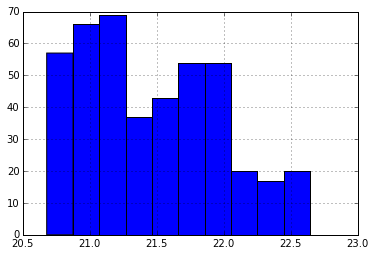

In [52]:
%matplotlib inline
locations_dataframe["latitud_limpia"].hist()

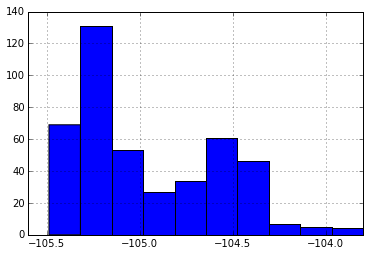

In [53]:
locations_dataframe["longitud_limpia"].hist()


In [54]:
def return_geopoint(longitude, latitude):
    geopoint = {
        "type" : "Point",
        "coordinates" : [ float(longitude), float(latitude) ]
    }
    return geopoint

In [63]:
output_list = []
for index, row in locations_dataframe.iterrows():
    row_document = dict(row)
    row_document["geopoint"] = return_geopoint(row_document["longitud_limpia"], row_document["latitud_limpia"])
    row_document["_id"] = row_document["no"]
    row_document = remove_keys(["longitud_limpia", "latitud_limpia","no"], row_document)
    output_list.append(row_document)
   

In [56]:
def remove_keys(list_keys, myDict):
    for key in list_keys:
        if key in myDict: 
            del myDict[key]
    return myDict

In [57]:
output_list[0]

{'altitud': 29.0,
 'capacidad': 200.0,
 'direccion': 'LOPEZ RAYON',
 'geopoint': {'coordinates': [-105.36035277777779, 22.49890555555556],
  'type': 'Point'},
 'latitud': '22°29\'56.06"',
 'longitud': '105°21\'37.27"',
 'municipio': 'ACAPONETA ',
 'no': 1.0,
 'refugio': 'PRIMARIA LABOR Y CONSTANCIA ',
 'responsable': 'DIR. ENRIQUE JIMENEZ LOPEZ.',
 'servicios': 'AGUA, SANITARIOS Y LUZ ELECTRICA',
 'telefono': 'CEL.-325-105-89-02',
 'uso': 'EDUCACION'}

In [61]:
db.locations.create_index([("geopoint", GEOSPHERE)])

'geopoint_2dsphere'

In [69]:
db.locations.insert_many(output_list)